Saving namecoin.csv to namecoin.csv


In [5]:

import pandas as pd
data=pd.read_csv("C:\\Users\\arjun\\Desktop\\allprices\\crypto-markets.csv")
data=data[data['slug']=='namecoin']
df=data


In [3]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-2f9cf6824058>", line 7, in <module>
    import tensorflow as tf
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 101, in <module>
    from tensorflow_core import *
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "C:\Users\arjun\Anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], pa

ModuleNotFoundError: No module named 'gast'

In [ ]:
df = df[['close']]

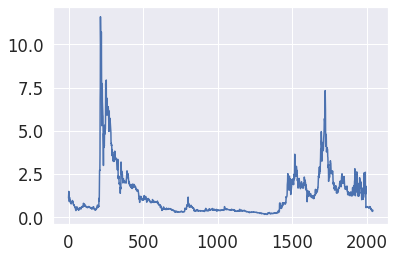

In [ ]:
plt.plot(df.close)

In [ ]:
data = []
for i in df['close']:
  if(i<=10):
    data.append(i)
hist = []
target = []
length = 30
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [ ]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [ ]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(2008, 30, 1)


In [ ]:
X_train = hist_scaled[:1950,:,:]
X_test = hist_scaled[1950:,:,:]
y_train = target[:1950,:]
y_test = target[1950:,:]

In [ ]:
newmodel = tf.keras.Sequential()
newmodel.add(layers.LSTM(units=64, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.Dropout(0.2))
newmodel.add(layers.LSTM(units=64))
newmodel.add(layers.Dropout(0.2))

newmodel.add(layers.Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
history = newmodel.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
122/122 [==============================] - 1s 9ms/step - loss: 0.6163
Epoch 2/20
122/122 [==============================] - 1s 9ms/step - loss: 0.2414
Epoch 3/20
122/122 [==============================] - 1s 9ms/step - loss: 0.1951
Epoch 4/20
122/122 [==============================] - 1s 9ms/step - loss: 0.1268
Epoch 5/20
122/122 [==============================] - 1s 9ms/step - loss: 0.1248
Epoch 6/20
122/122 [==============================] - 1s 8ms/step - loss: 0.1303
Epoch 7/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0916
Epoch 8/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0997
Epoch 9/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0838
Epoch 10/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0826
Epoch 11/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0890
Epoch 12/20
122/122 [==============================] - 1s 9ms/step - loss: 0.0702
Epoch 13/20
122/122 [====

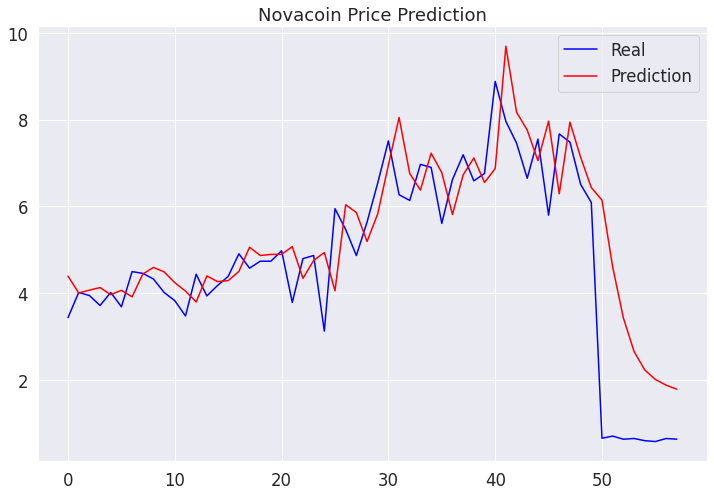

In [ ]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Novacoin Price Prediction')
plt.legend()
plt.show()

In [ ]:
def predictor(model,X_train,n,length):
    x_input = X_train[-1]
    n_steps=length
    n_features=1
    temp_input=list(x_input)
    lst_output=[]
    i=0
    while(i<n):
        if(len(temp_input)>length):
            #print("new this")
            x_input=np.array(temp_input[1:])
              #print("{} day input {}".format(i,x_input.shape))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            #print(x_input)
            x_input=np.asarray(x_input).astype(np.float64)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.append(yhat)
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat)
            i=i+1
            
        else:
            #print("inside else")
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            yhat = model.predict(x_input, verbose=0)
            print("0 day output",yhat)
            temp_input.append(yhat)
            #print(len(temp_input))
            lst_output.append(yhat)
            i=i+1
    return lst_output



In [ ]:
n = int(input("Which day's value you wanna know:"))

In [ ]:
t = predictor(model=newmodel,X_train=X_train,n=n,length=length)

0 day output [[370.03625]]
0 day output [[370.03625]]
0 day output [[370.03625]]
0 day output [[370.03625]]


In [ ]:
t =np.array(t)
t = t.reshape(n,1)

NameError: ignored

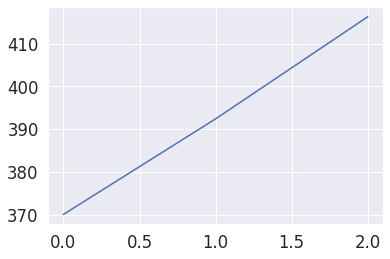

In [ ]:
plt.plot(t)